<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/12-VideoSources/seabornVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Bu not defterinde:
 - "Tips" veri kümesine benzer bir CSV dosyasını yükleyeceğiz.
 - **pandas** kullanarak veriyi keşfedecek ve temizleyeceğiz.
 - **seaborn** ve **matplotlib** kullanarak gelişmiş grafiklerle veriyi görselleştireceğiz.

In [1]:
# Kütüphaneler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Seaborn için güzel bir tema ayarlayalım
sns.set_theme(style="whitegrid")

## Veri Hazırlama

 Bu örnek için, restoran bahşişlerini içeren örnek bir CSV dosyası oluşturuyoruz.
 Kendi CSV dosyanızı kullanmak isterseniz, oluşturma adımını atlayıp dosyanızı yükleyebilirsiniz.
 Burada csv dosyalarını elimizdeki datadan oluşturmayı görüyoruz.


In [2]:
# Örnek DataFrame oluşturma
data = {
    'hesap': [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78,
                   34.00, 17.50, 22.30, 12.45, 18.65, 28.75, 19.80, 11.00, 27.30, 13.90],
    'bahsis': [1.01, 1.66, 3.50, 3.31, 3.61, 4.71, 2.00, 3.12, 1.96, 3.23,
            5.00, 2.50, 4.00, 2.10, 3.40, 4.80, 3.00, 1.50, 4.20, 2.80],
    'cinsiyet': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
            'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'sigara tüketimi': ['No'] * 20,
    'gün': ['Sun'] * 10 + ['Sat'] * 10,
    # İlk 10 kayıt için öğle, sonraki 10 kayıt için akşam yemeği
    'öğün': ['Öğle Yemeği'] * 10 + ['Akşam Yemeği'] * 10,
    'kişi sayısı': [2, 3, 3, 2, 4, 4, 2, 4, 2, 2,
             4, 2, 3, 2, 4, 5, 2, 3, 4, 2]
}


# datadan bir csv dosyası oluşturuyrouz
df = pd.DataFrame(data)

# DataFrame'i CSV dosyası olarak kaydetme
csv_filename = 'sample.csv'
df.to_csv(csv_filename, index=False)
print(f"CSV dosyası '{csv_filename}' başarıyla oluşturuldu!")


CSV dosyası 'sample.csv' başarıyla oluşturuldu!


Artık bu dataları bir csv yaptığımız için, csvden okuma yapabilriz. Elinde bir csv dosyası var ise aynı şekilde okuman mümkün.

In [3]:
# CSV dosyasını yükleme
df = pd.read_csv(csv_filename)


Pandas kullanarak veriyi biraz inceleyelim

In [4]:
# Veri kümesinin ilk birkaç satırını görüntüleme
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Öğle Yemeği,2
1,10.34,1.66,Male,No,Sun,Öğle Yemeği,3
2,21.01,3.50,Male,No,Sun,Öğle Yemeği,3
3,23.68,3.31,Male,No,Sun,Öğle Yemeği,2
4,24.59,3.61,Female,No,Sun,Öğle Yemeği,4


In [5]:
# Veri kümesine ait temel bilgilerin görüntülenmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  20 non-null     float64
 1   tip         20 non-null     float64
 2   sex         20 non-null     object 
 3   smoker      20 non-null     object 
 4   day         20 non-null     object 
 5   time        20 non-null     object 
 6   size        20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


In [ ]:
# Veri kümesinin istatistiksel özetinin görüntülenmesi
df.describe()

## Seaborn ve Matplotlib ile Veri Görselleştirme
Şimdi verideki çeşitli özellikleri göstermek için bir dizi grafik oluşturalım.

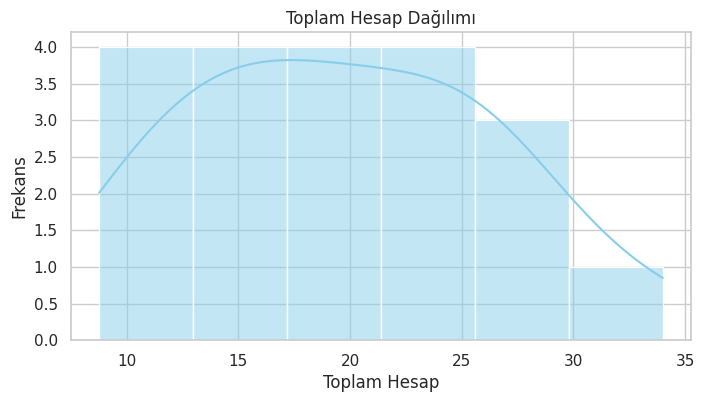

In [8]:
# Toplam hesap dağılımı
plt.figure(figsize=(8, 4))
sns.histplot(df['total_bill'], kde=True, color="skyblue")
plt.title("Toplam Hesap Dağılımı")
plt.xlabel("Toplam Hesap")
plt.ylabel("Frekans")
plt.show()

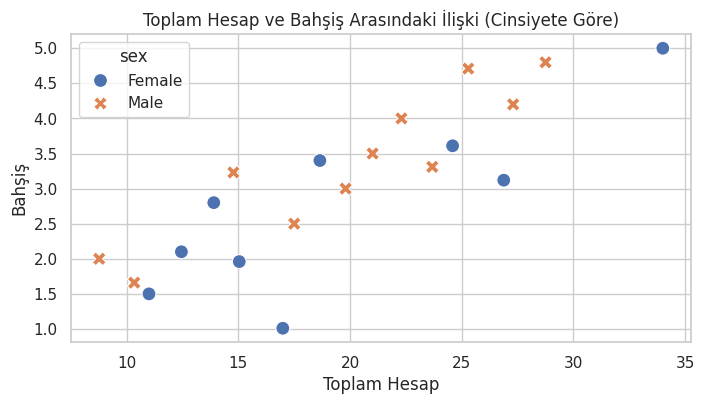

In [9]:
# Toplam hesap ve bahşiş arasındaki ilişkiyi gösteren saçılma grafiği
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', style='sex', s=100)
plt.title("Toplam Hesap ve Bahşiş Arasındaki İlişki (Cinsiyete Göre)")
plt.xlabel("Toplam Hesap")
plt.ylabel("Bahşiş")
plt.show()

<ipython-input-10-a782ff8640e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='total_bill', palette="Pastel1")


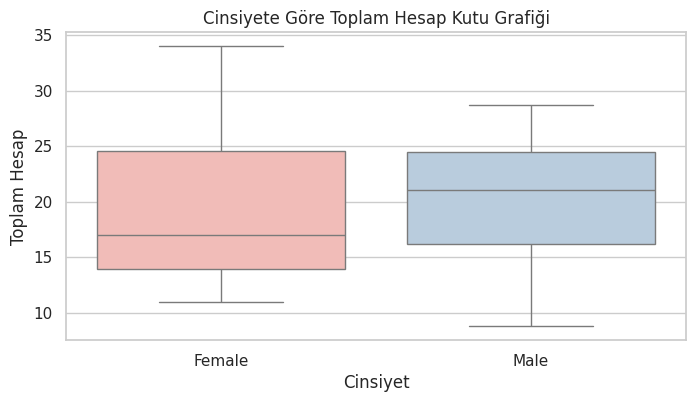

In [10]:
# Cinsiyete göre toplam hesap dağılımını gösteren kutu grafiği
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='sex', y='total_bill', palette="Pastel1")
plt.title("Cinsiyete Göre Toplam Hesap Kutu Grafiği")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Hesap")
plt.show()

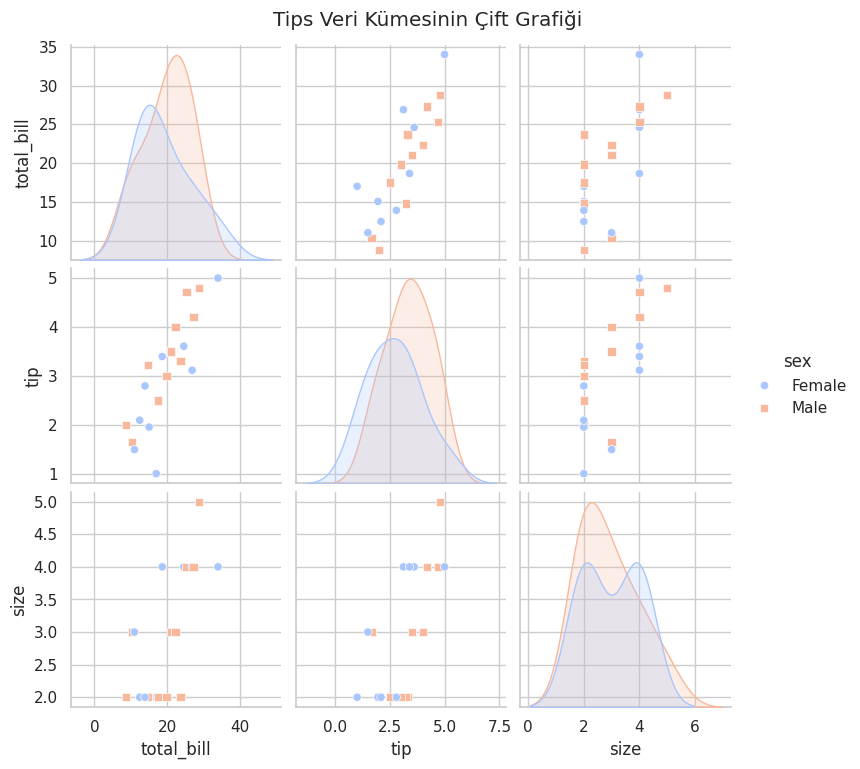

In [12]:
# Tüm sayısal değişkenler arasındaki ilişkileri keşfetmek için çift grafiği
sns.pairplot(df, hue='sex', palette="coolwarm", markers=["o", "s"])
plt.suptitle("Tips Veri Kümesinin Çift Grafiği", y=1.02)
plt.show()

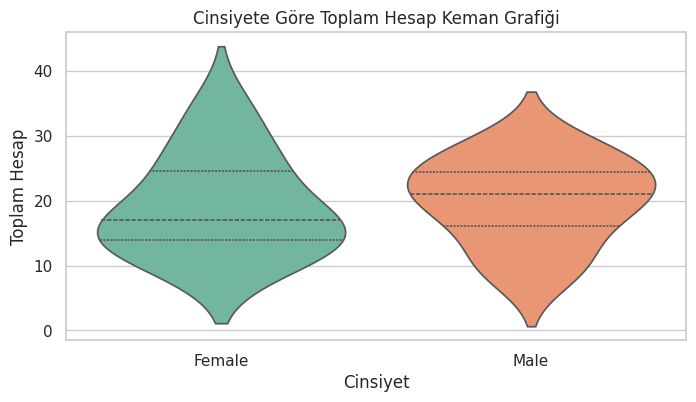

In [19]:
# Keman grafiği: Kutu grafiği ve yoğunluk grafiğinin birleşimi
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='sex', y='total_bill', hue='sex', palette="Set2", inner="quartile", legend=False)
plt.title("Cinsiyete Göre Toplam Hesap Keman Grafiği")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Hesap")
plt.show()

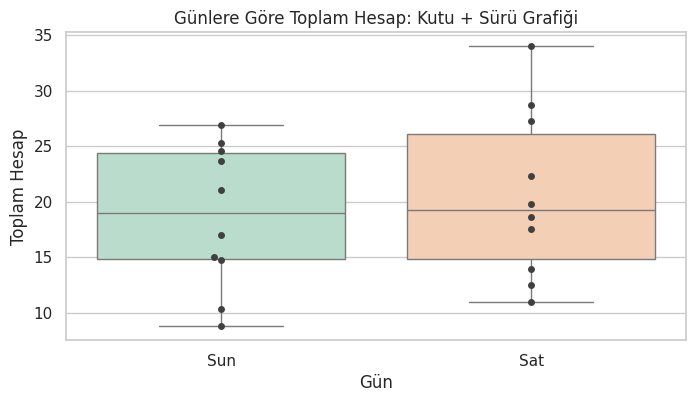

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='day', y='total_bill', hue='day', palette="Pastel2", showfliers=False, legend=False)
sns.swarmplot(data=df, x='day', y='total_bill', color=".25")
plt.title("Günlere Göre Toplam Hesap: Kutu + Sürü Grafiği")
plt.xlabel("Gün")
plt.ylabel("Toplam Hesap")
plt.show()


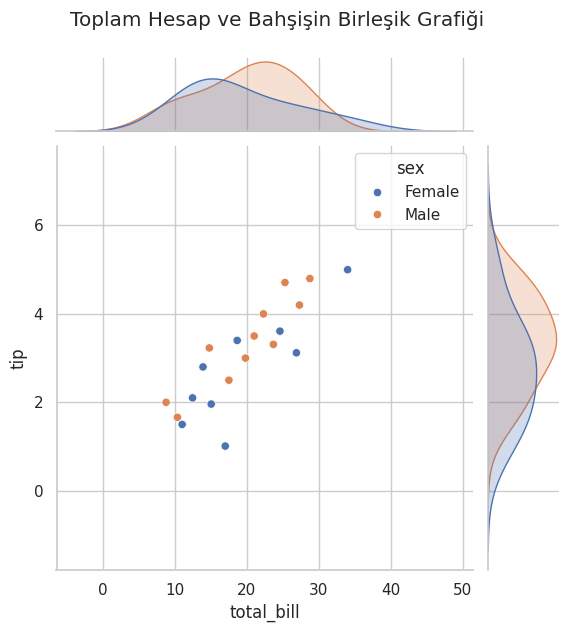

In [15]:
# Birleşik grafik: Toplam hesap ve bahşiş arasındaki ilişkiyi kenar dağılımları ile gösterir
sns.jointplot(data=df, x='total_bill', y='tip', kind="scatter", hue='sex', palette="deep")
plt.suptitle("Toplam Hesap ve Bahşişin Birleşik Grafiği", y=1.05)
plt.show()


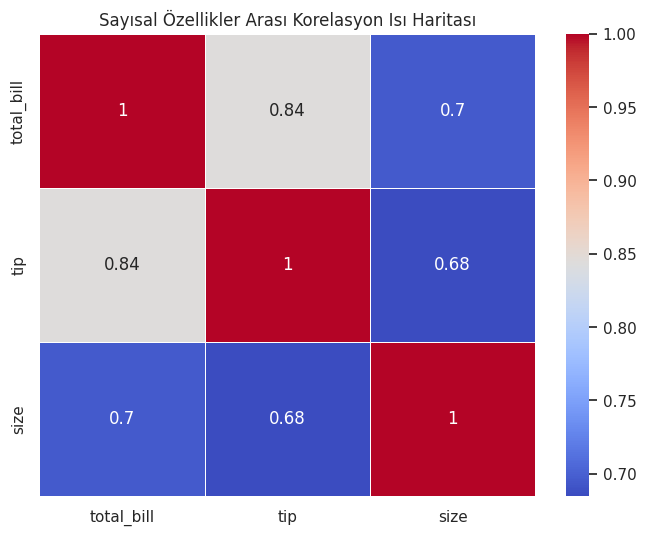

In [16]:


# Isı haritası: Sayısal değişkenlerin korelasyon matrisini görselleştirir
plt.figure(figsize=(8, 6))
corr = df[['total_bill', 'tip', 'size']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Sayısal Özellikler Arası Korelasyon Isı Haritası")
plt.show()

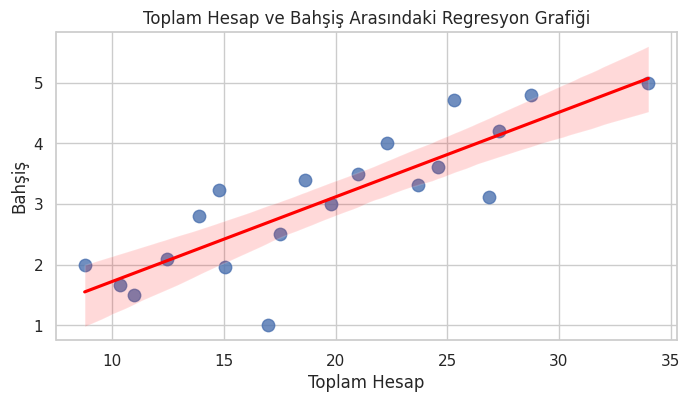

In [17]:
# Regresyon grafiği: Toplam hesap ve bahşiş arasındaki doğrusal ilişkiyi gösterir
plt.figure(figsize=(8, 4))
sns.regplot(data=df, x='total_bill', y='tip', scatter_kws={'s': 80}, line_kws={'color': 'red'})
plt.title("Toplam Hesap ve Bahşiş Arasındaki Regresyon Grafiği")
plt.xlabel("Toplam Hesap")
plt.ylabel("Bahşiş")
plt.show()

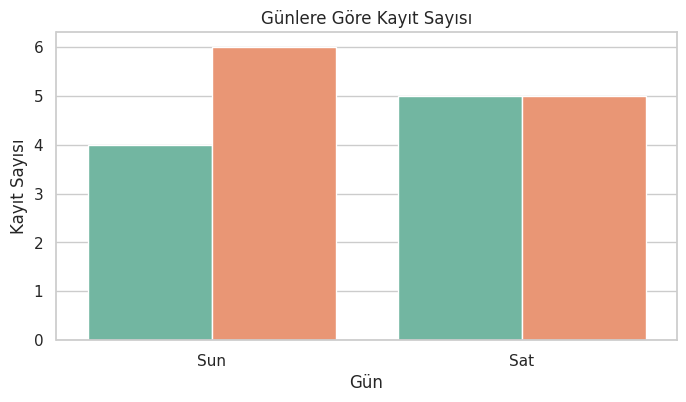

In [25]:
# Kayıt sayısı grafiği: Her güne ait kayıt sayısını gösterir
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='day', hue='sex', palette="Set2", legend=False)
plt.title("Günlere Göre Kayıt Sayısı")
plt.xlabel("Gün")
plt.ylabel("Kayıt Sayısı")
plt.show()

<Figure size 1200x600 with 0 Axes>

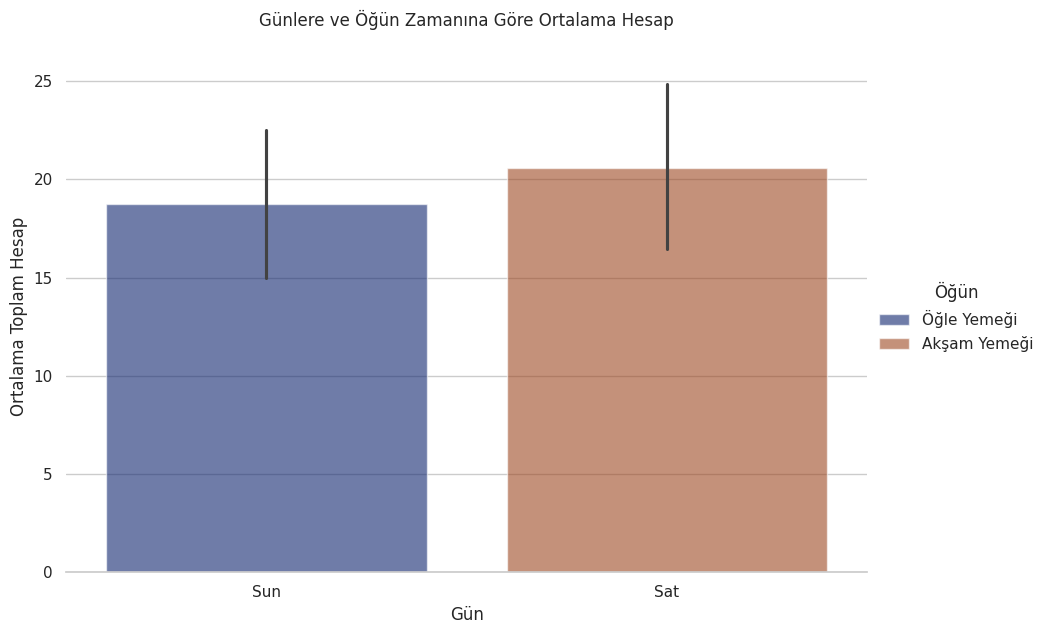

In [26]:
# Yeni Grafik 1: Kategorik Çubuk Grafiği Gelişmiş (Facet Grid)
plt.figure(figsize=(12, 6))
g = sns.catplot(
    data=df, kind="bar",
    x="day", y="total_bill", hue="time",
    palette="dark", alpha=.6, height=6, aspect=1.5
)
g.despine(left=True)
g.set_axis_labels("Gün", "Ortalama Toplam Hesap")
g.legend.set_title("Öğün")
plt.title("Günlere ve Öğün Zamanına Göre Ortalama Hesap", y=1.05)
plt.show()

<Figure size 1000x600 with 0 Axes>

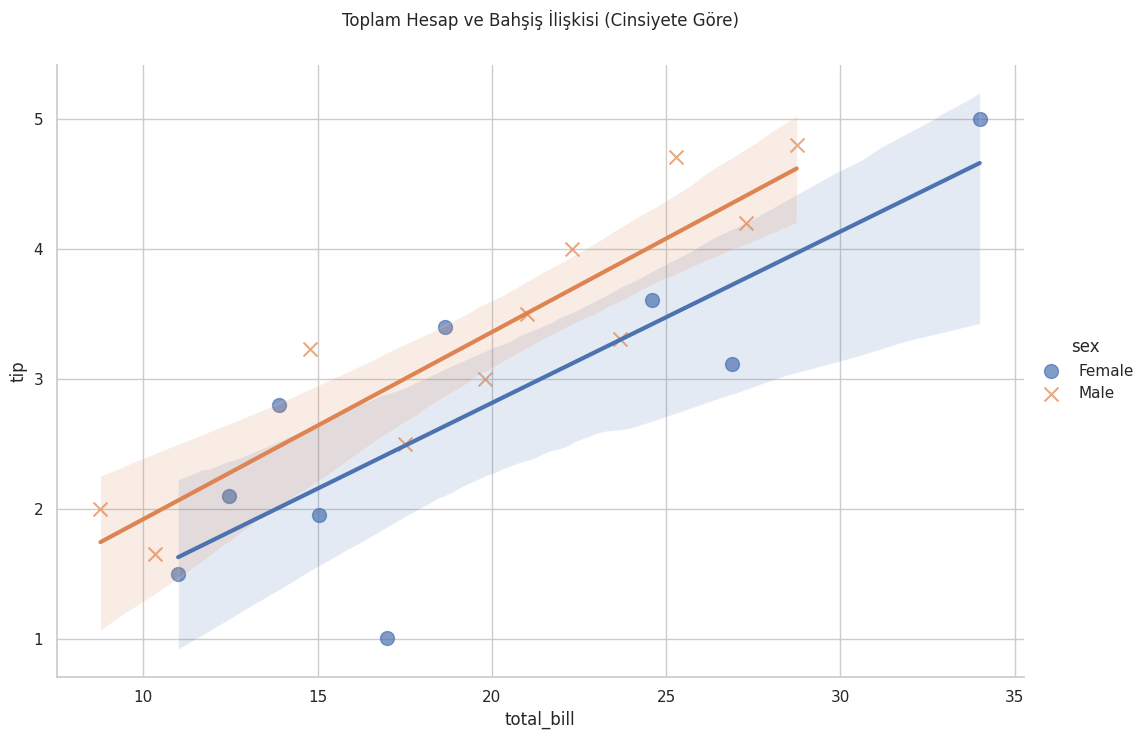

In [27]:
# Yeni Grafik 2: Daha Gelişmiş Regresyon Grafiği (Bootstrap Interval)
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=df, x="total_bill", y="tip",
    hue="sex", height=7, aspect=1.5,
    scatter_kws={"s": 100, "alpha": 0.7},
    line_kws={"linewidth": 3},
    markers=["o", "x"]
)
plt.title("Toplam Hesap ve Bahşiş İlişkisi (Cinsiyete Göre)", y=1.05)
plt.show()

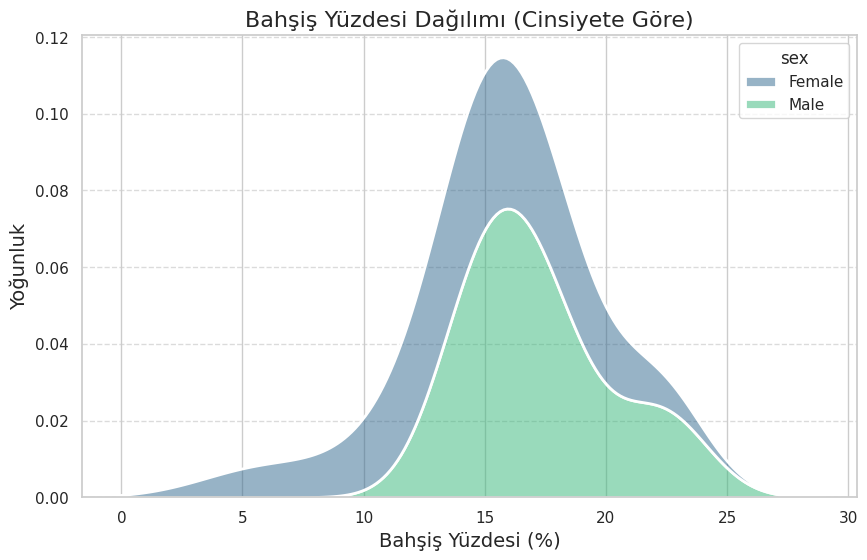

In [28]:
# Yeni Grafik 3: Bahşiş Yüzdesi Dağılımı
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
plt.figure(figsize=(10, 6))
# KDE (Çekirdek Yoğunluk Tahmini) Grafiği
sns.kdeplot(
    data=df, x="tip_percent",
    hue="sex", multiple="stack",
    palette="viridis", linewidth=2,
    fill=True, alpha=0.5
)
plt.title("Bahşiş Yüzdesi Dağılımı (Cinsiyete Göre)", fontsize=16)
plt.xlabel("Bahşiş Yüzdesi (%)", fontsize=14)
plt.ylabel("Yoğunluk", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pivot tablosunda eksik değerler var, doldurulacak.


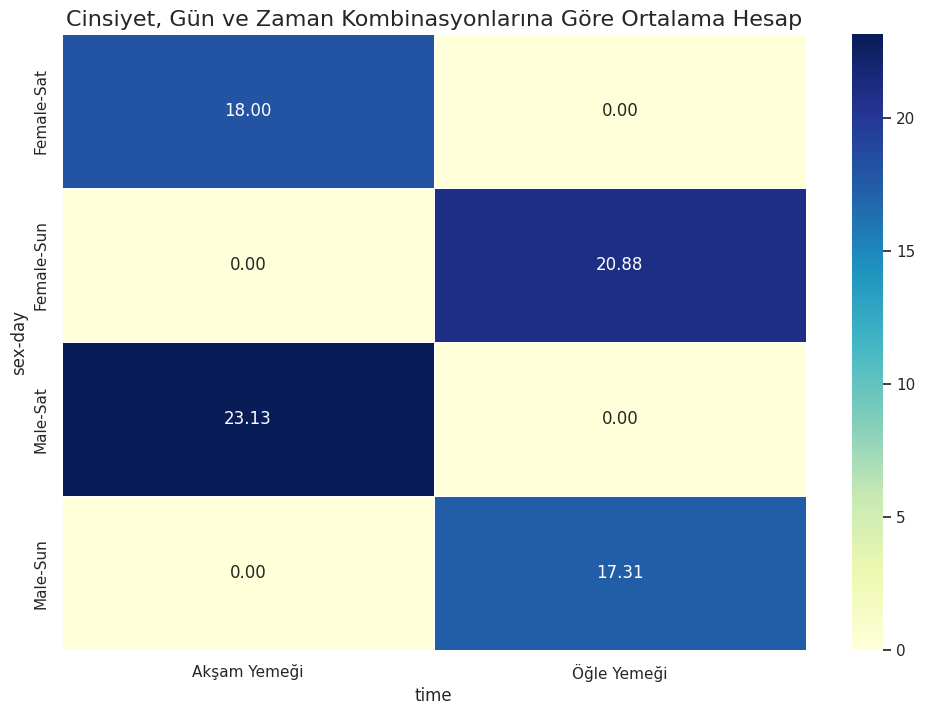

In [31]:
# Clustermap için düzeltilmiş kod
# Pivot tablosunda NaN değerleri 0 ile doldurma veya eksik değerleri tamamen kaldırma

# Yaklaşım 1: NaN değerleri doldurmak
pivot_table = pd.pivot_table(
    df,
    values='total_bill',
    index=['sex', 'day'],
    columns='time',
    aggfunc='mean'
)

# NaN değerleri kontrol et ve doldur
if pivot_table.isnull().values.any():
    print("Pivot tablosunda eksik değerler var, doldurulacak.")
    pivot_table = pivot_table.fillna(0)  # Eksik değerleri 0 ile doldur

# Isı haritası olarak göster (clustermap yerine)
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Cinsiyet, Gün ve Zaman Kombinasyonlarına Göre Ortalama Hesap", fontsize=16)
plt.show()


<Figure size 1200x800 with 0 Axes>

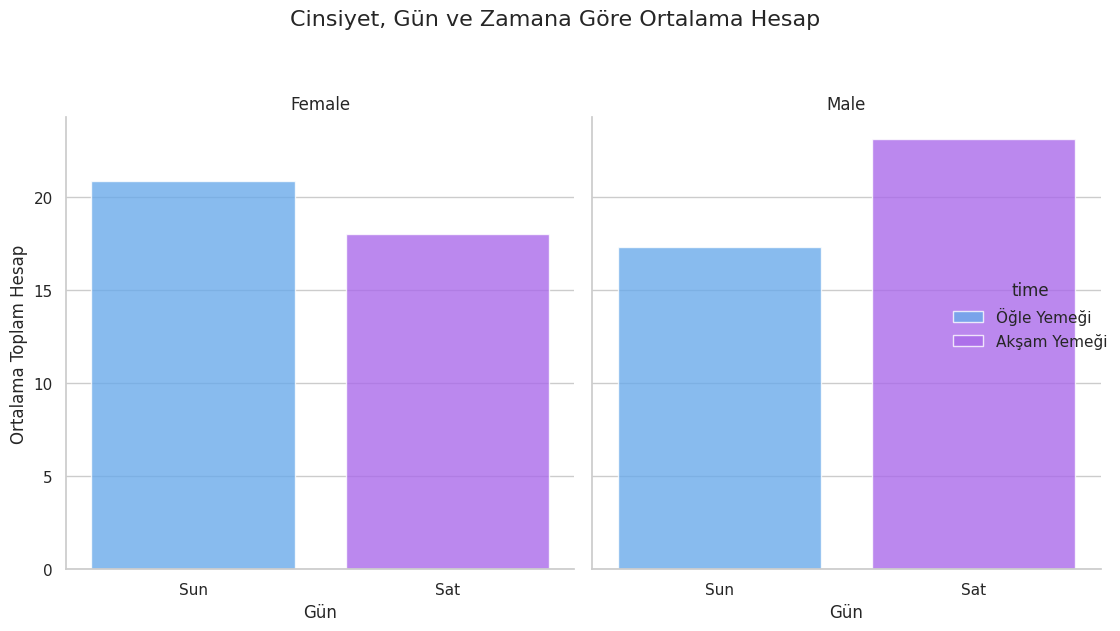

In [32]:
# Alternatif: Daha güzel bir grup karşılaştırma grafiği
# Factor plot kullanarak kategorileri karşılaştırma
plt.figure(figsize=(12, 8))
g = sns.catplot(
    data=df,
    kind="bar",
    x="day",
    y="total_bill",
    hue="time",
    col="sex",
    palette="cool",
    height=6,
    aspect=0.8,
    errorbar=None,
    alpha=0.8
)
g.fig.suptitle("Cinsiyet, Gün ve Zamana Göre Ortalama Hesap", fontsize=16, y=1.05)
g.set_axis_labels("Gün", "Ortalama Toplam Hesap")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

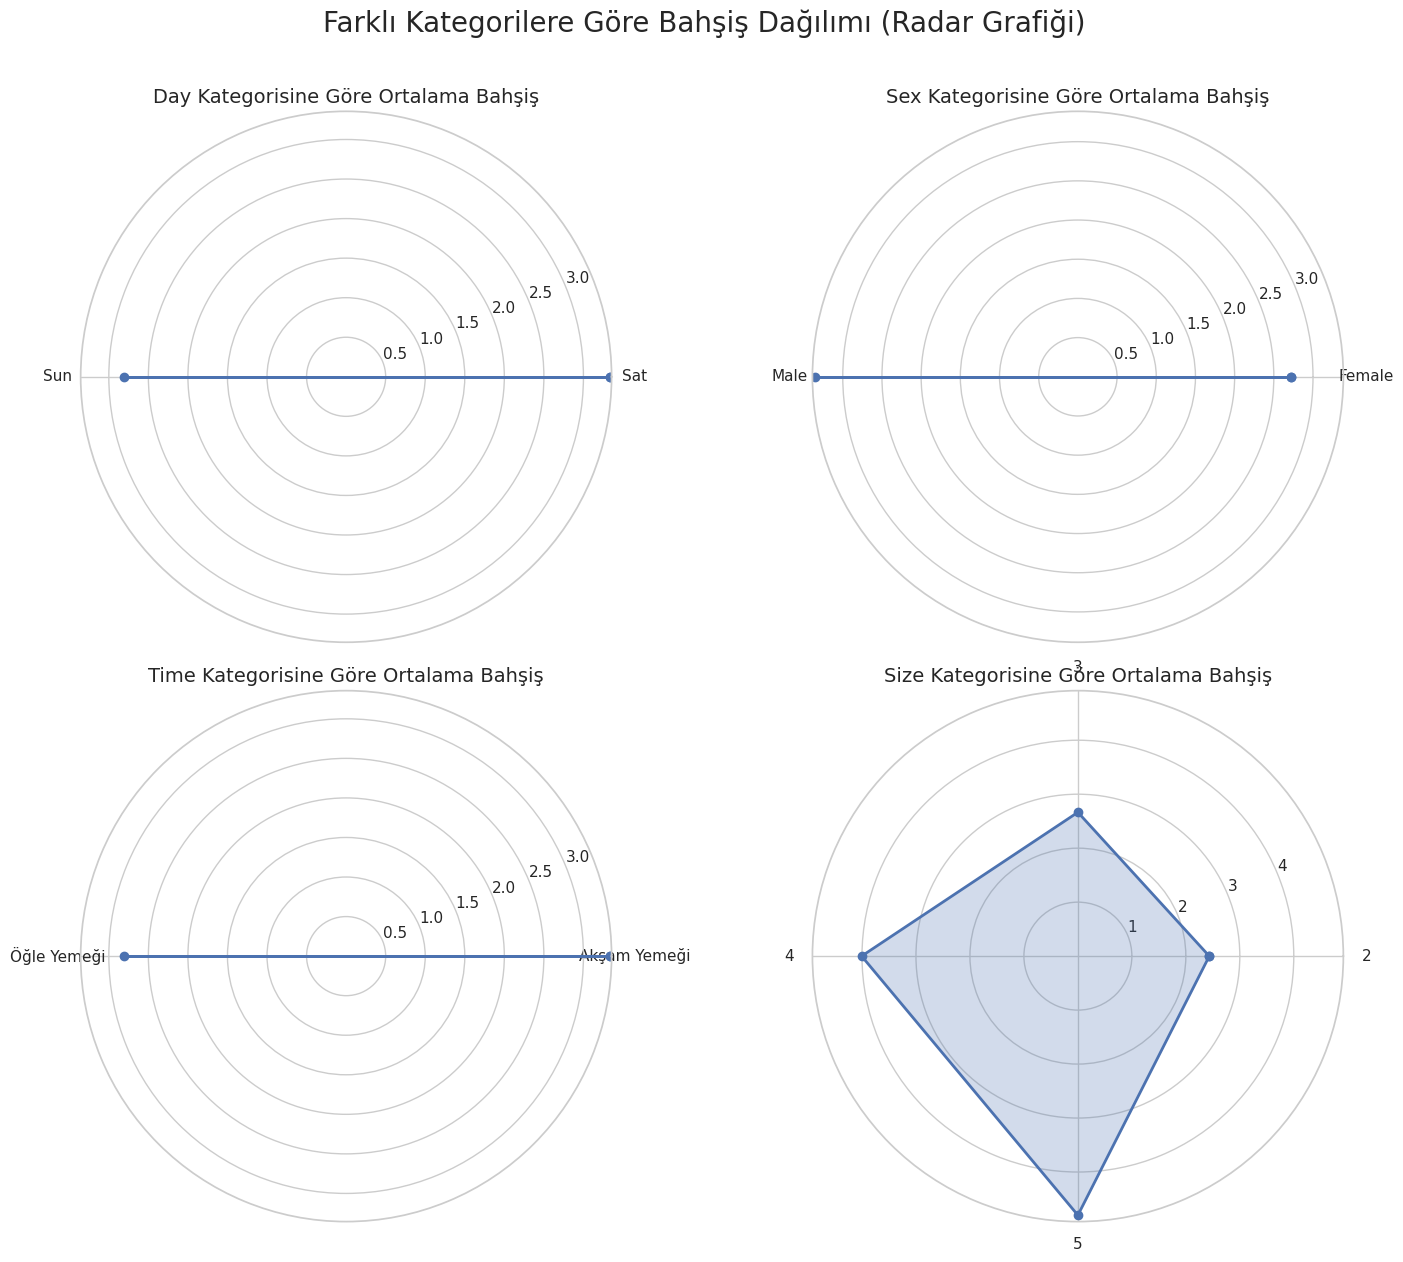

In [34]:
# Yeni Grafik 5: Radar Grafiği (Örümcek Ağı Grafiği)
# Kategorik değişkenlere göre ortalama bahşişleri hesaplama
categories = ['day', 'sex', 'time', 'size']
radar_data = {}

for cat in categories:
    if cat == 'size':
        # Sayısal boyut sütununu kategori olarak ele alalım
        df['size_cat'] = df['size'].astype(str)
        radar_data[cat] = df.groupby('size_cat')['tip'].mean().to_dict()
    else:
        radar_data[cat] = df.groupby(cat)['tip'].mean().to_dict()

# Radar grafiği için figür oluşturma
plt.figure(figsize=(12, 10))

# Maksimum kategori sayısını bulalım
max_categories = max(len(v) for v in radar_data.values())
angles = np.linspace(0, 2*np.pi, max_categories, endpoint=False).tolist()

# Her kategori türü için ayrı bir subplot oluşturma
fig, axes = plt.subplots(2, 2, figsize=(15, 12), subplot_kw=dict(polar=True))
axes = axes.flatten()

for i, (category, values) in enumerate(radar_data.items()):
    ax = axes[i]

    # Değerler ve kategorileri ayarlama
    categories_list = list(values.keys())
    values_list = list(values.values())

    # Tam bir daire için değerleri kapatma
    values_list.append(values_list[0])
    categories_list.append(categories_list[0])

    # Açıları kategorilere göre ayarlama
    cat_angles = np.linspace(0, 2*np.pi, len(categories_list)-1, endpoint=False).tolist()
    cat_angles.append(cat_angles[0])  # Daireyi tamamlama

    # Radar çizgisini çizme
    ax.plot(cat_angles, values_list, 'o-', linewidth=2, label=category)
    ax.fill(cat_angles, values_list, alpha=0.25)

    # Grafiği güzelleştirme
    ax.set_thetagrids(np.degrees(cat_angles[:-1]), categories_list[:-1])
    ax.set_title(f"{category.capitalize()} Kategorisine Göre Ortalama Bahşiş", fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Farklı Kategorilere Göre Bahşiş Dağılımı (Radar Grafiği)", fontsize=20, y=1.05)
plt.show()

<Figure size 1000x800 with 0 Axes>

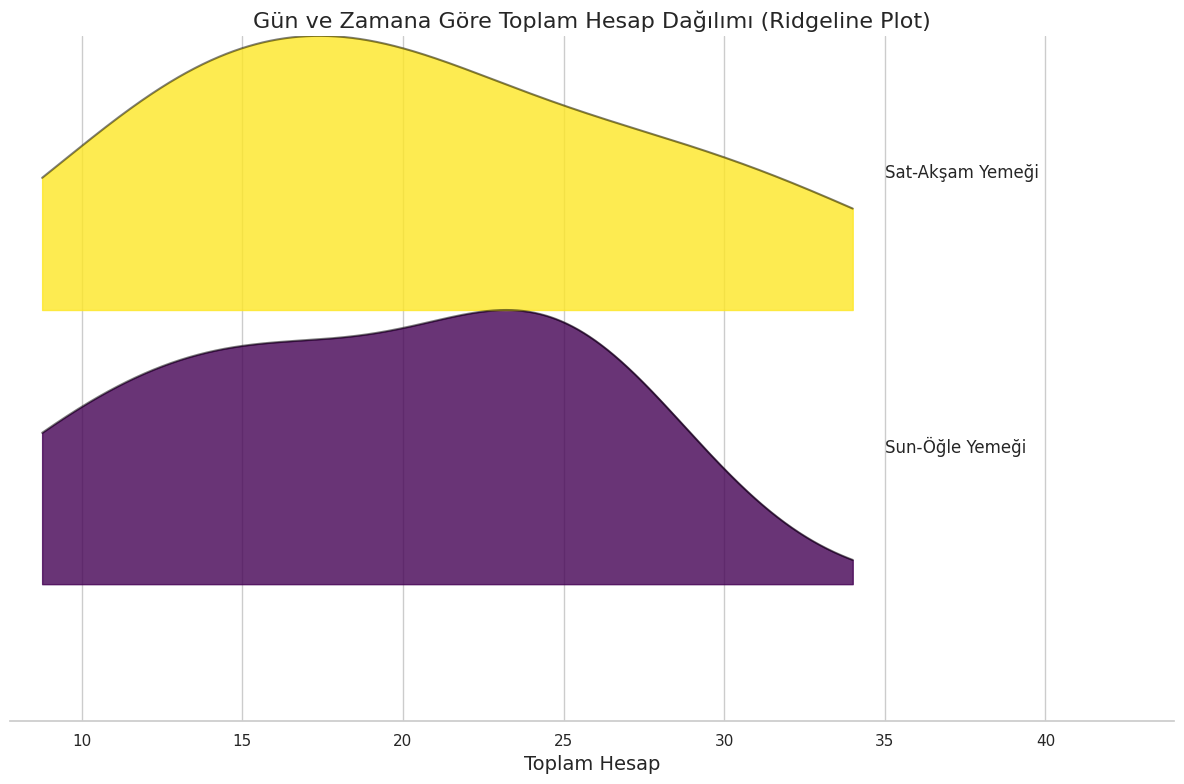

In [35]:
# Yeni Grafik 6: Ridgeline Plot (Joy Plot) - Kategorilere göre yoğunluk dağılımlarını gösterir
import matplotlib.colors as mcolors
from scipy import stats

plt.figure(figsize=(10, 8))

# Her grup için ayrı bir yoğunluk eğrisi
days = df['day'].unique()
times = df['time'].unique()
all_groups = []

for day in days:
    for time in times:
        group = df[(df['day'] == day) & (df['time'] == time)]
        if len(group) > 0:
            all_groups.append((f"{day}-{time}", group))

# Renk paleti oluşturma
colors = plt.cm.viridis(np.linspace(0, 1, len(all_groups)))
y_positions = np.arange(len(all_groups))

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(12, 8))

for i, ((day_time, group), color) in enumerate(zip(all_groups, colors)):
    # Kernel yoğunluk tahmini
    x = np.linspace(df['total_bill'].min(), df['total_bill'].max(), 1000)
    kde = stats.gaussian_kde(group['total_bill'])
    y = kde(x)

    # Yoğunluk eğrisini çizme
    ax.fill_between(x, i + y/y.max(), i, alpha=0.8, color=color)
    ax.plot(x, i + y/y.max(), color='black', alpha=0.5)

    # Grup etiketleri
    ax.text(df['total_bill'].max() + 1, i + 0.5, day_time, fontsize=12, va='center')

# Grafik düzenlemeleri
ax.set_yticks([])
ax.set_ylim(-0.5, len(all_groups))
ax.set_xlim(df['total_bill'].min() - 1, df['total_bill'].max() + 10)
ax.set_xlabel("Toplam Hesap", fontsize=14)
ax.set_title("Gün ve Zamana Göre Toplam Hesap Dağılımı (Ridgeline Plot)", fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


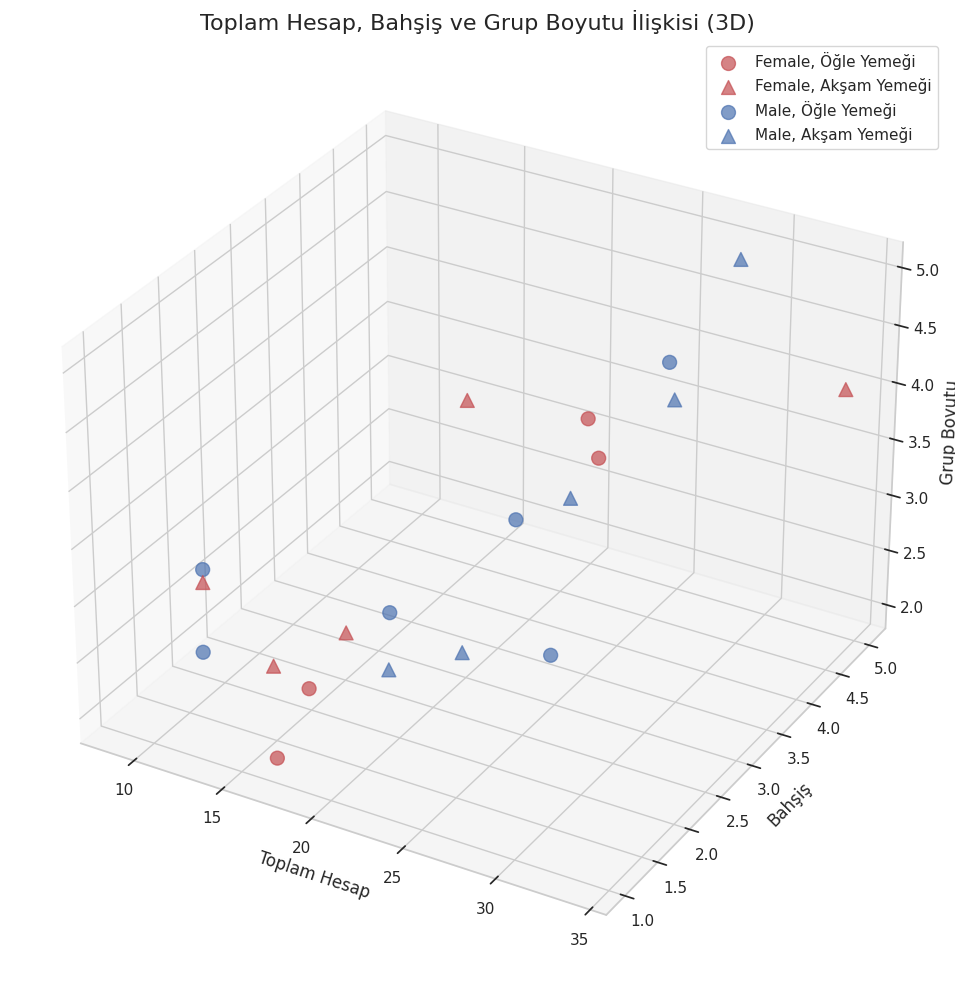

In [36]:
# Yeni Grafik 7: 3D Saçılım Grafiği
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Renk kodlaması için veri hazırlama
colors = {'Female': 'r', 'Male': 'b'}
markers = {'Öğle Yemeği': 'o', 'Akşam Yemeği': '^'}

# Her kayıt için 3D nokta çizimi
for sex in df['sex'].unique():
    for time in df['time'].unique():
        subset = df[(df['sex'] == sex) & (df['time'] == time)]
        ax.scatter(
            subset['total_bill'],
            subset['tip'],
            subset['size'],
            c=colors[sex],
            marker=markers[time],
            s=100,
            alpha=0.7,
            label=f"{sex}, {time}"
        )

# Grafik düzenlemeleri
ax.set_xlabel('Toplam Hesap', fontsize=12)
ax.set_ylabel('Bahşiş', fontsize=12)
ax.set_zlabel('Grup Boyutu', fontsize=12)
ax.set_title('Toplam Hesap, Bahşiş ve Grup Boyutu İlişkisi (3D)', fontsize=16)

# Gösterge ekleme (farklı gösterge elemanlarını yalnızca bir kez göstermek için)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.tight_layout()
plt.show()